In [1]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [5]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

def r2(y, y_pred):
    return 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

def mape(y, y_pred):
    return (np.mean(np.divide(np.absolute(np.subtract(y,y_pred)), y))*100)

def errors(y, y_pred):
    return np.absolute(y - y_pred)

In [174]:
########################################
### Yield Pred SUMMER Elements Split ###
########################################

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = ['Unnamed: 0'])

print(display(df))

df = df.drop(columns = ['CO2_kg_per_Ha'])

# #filter outliers
df = df[(df['Yield_kg_per_Ha'] > df['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df['Yield_kg_per_Ha'] < df['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_as_Urea_kg_per_Ha,N_as_Nitrate_kg_per_Ha,N_as_Ammonium_kg_per_Ha,P_as_Phosphorus_kg_per_Ha,P_as_P2O5_kg_per_Ha,K_as_Potassium_kg_per_Ha,K_as_K2O_kg_per_Ha
0,-246.74,14.0,3.690000,7586.243386,170.20,0.000,0.000,0.0,0.0,0.0,0.0
1,219.02,20.0,3.380000,7204.924242,87.40,0.000,0.000,0.0,0.0,0.0,90.0
2,860.73,18.0,2.681429,11941.555556,0.00,37.125,37.125,0.0,0.0,0.0,0.0
3,799.98,17.0,2.681429,10673.777778,0.00,37.125,37.125,0.0,0.0,0.0,0.0
4,1426.97,25.0,2.316250,6964.509804,187.68,0.000,24.200,0.0,114.4,0.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...
410,449.67,16.0,2.690000,8992.923077,128.80,0.000,24.200,0.0,114.4,0.0,78.0
411,-1035.15,15.0,5.380000,11044.670659,128.80,0.000,24.200,0.0,114.4,0.0,78.0
412,-1092.21,13.0,5.380000,10502.634731,128.80,0.000,24.200,0.0,114.4,0.0,81.0
413,-427.99,15.0,3.750000,6746.722689,128.80,0.000,24.200,0.0,114.4,0.0,81.0


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_as_Urea_kg_per_Ha,N_as_Nitrate_kg_per_Ha,N_as_Ammonium_kg_per_Ha,P_as_Phosphorus_kg_per_Ha,P_as_P2O5_kg_per_Ha,K_as_Potassium_kg_per_Ha,K_as_K2O_kg_per_Ha
0,14.0,3.690000,7586.243386,170.20,0.000,0.000,0.0,0.0,0.0,0.0
1,20.0,3.380000,7204.924242,87.40,0.000,0.000,0.0,0.0,0.0,90.0
2,17.0,2.681429,10673.777778,0.00,37.125,37.125,0.0,0.0,0.0,0.0
3,25.0,2.316250,6964.509804,187.68,0.000,24.200,0.0,114.4,0.0,120.0
4,15.0,3.050000,6791.805556,0.00,23.000,0.000,75.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
368,15.0,2.500000,7693.066667,165.60,36.000,0.000,63.0,0.0,54.0,96.0
369,16.0,2.690000,8992.923077,128.80,0.000,24.200,0.0,114.4,0.0,78.0
370,13.0,5.380000,10502.634731,128.80,0.000,24.200,0.0,114.4,0.0,81.0
371,15.0,3.750000,6746.722689,128.80,0.000,24.200,0.0,114.4,0.0,81.0


None


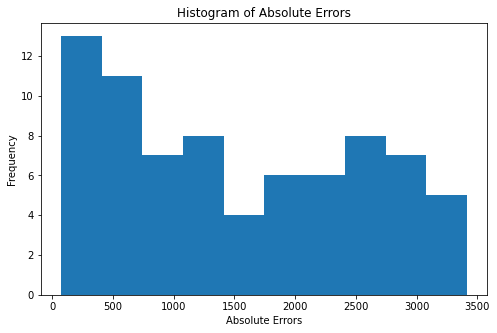

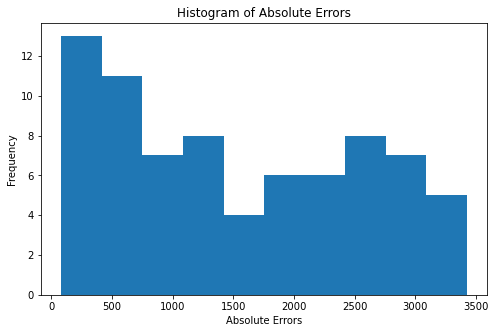

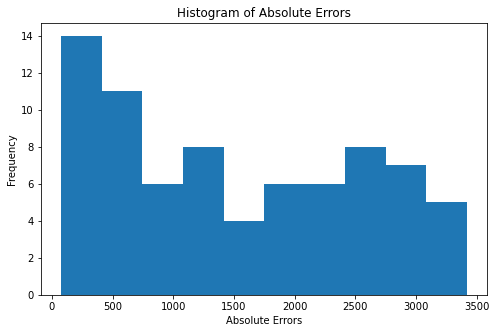

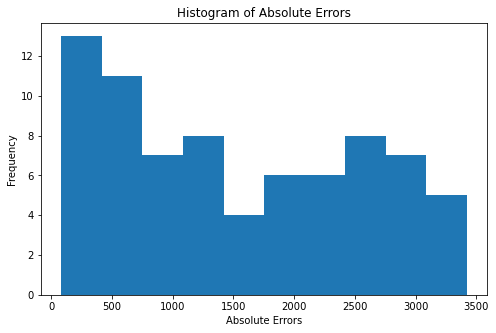

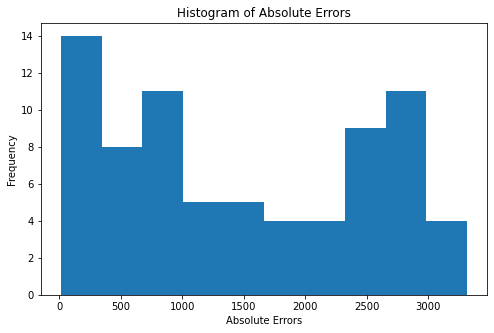

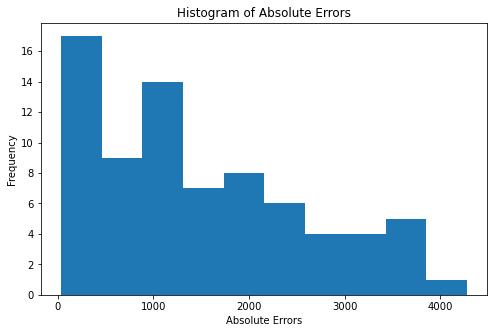

[20:27:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


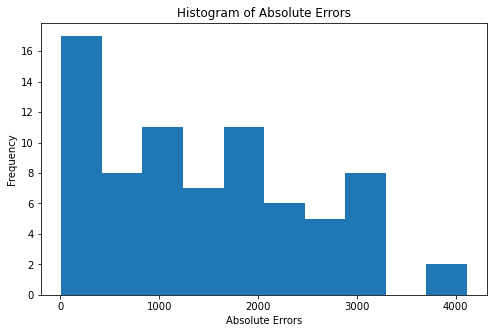

In [175]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                   LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                 bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()

OLS
MAE on test data: 1505.1496582865652
RMSE on test data: 1816.3790963808763
R squared on test data: -0.103232337881763
MAPE on test data: 24.272882750546536


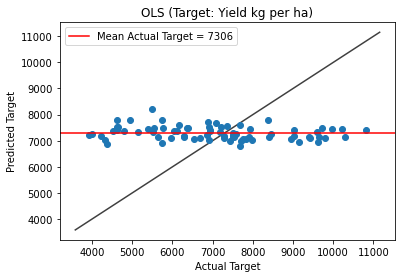

Lasso
MAE on test data: 1504.3289958397497
RMSE on test data: 1815.95526388181
R squared on test data: -0.10271754318202109
MAPE on test data: 24.260891945876523


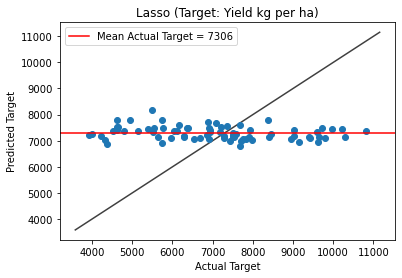

Ridge
MAE on test data: 1500.1772494031402
RMSE on test data: 1812.0163615945428
R squared on test data: -0.09793902676894728
MAPE on test data: 24.200886758208792


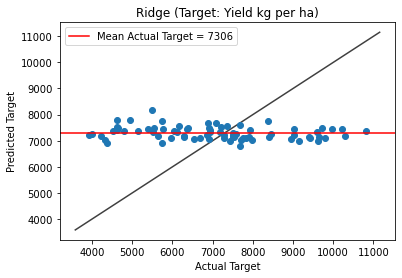

ElasticNet
MAE on test data: 1504.4315147446623
RMSE on test data: 1816.007254756766
R squared on test data: -0.10278068578441646
MAPE on test data: 24.26239000806089


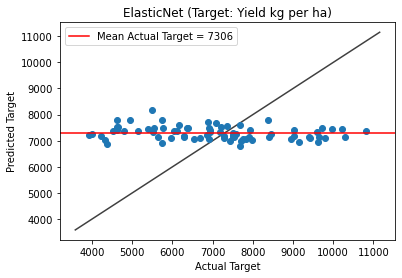

SVR
MAE on test data: 1479.2746125500073
RMSE on test data: 1800.0064946032842
R squared on test data: -0.08343319353336365
MAPE on test data: 23.571369448460423


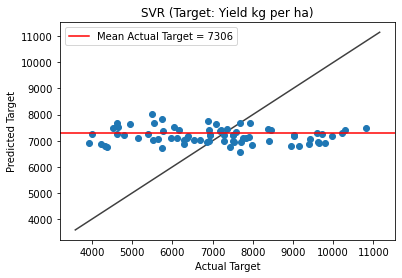

GBR
MAE on test data: 1510.9932509053413
RMSE on test data: 1874.3730858226056
R squared on test data: -0.17480577331420077
MAPE on test data: 23.179656615591902


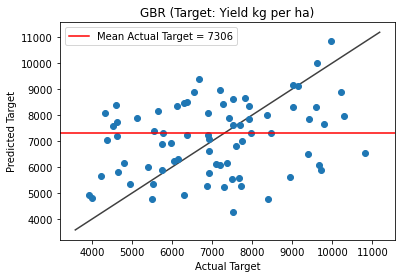

XGBoost
MAE on test data: 1478.8197401585737
RMSE on test data: 1811.8458842949037
R squared on test data: -0.09773244488632815
MAPE on test data: 23.492478138584662


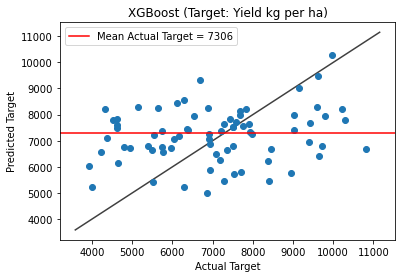

In [176]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

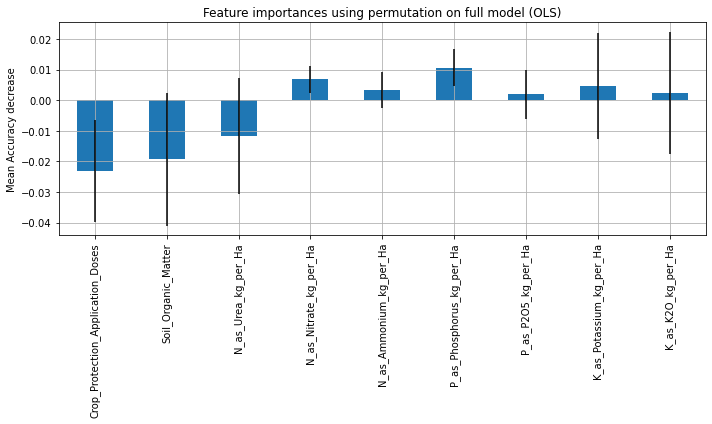

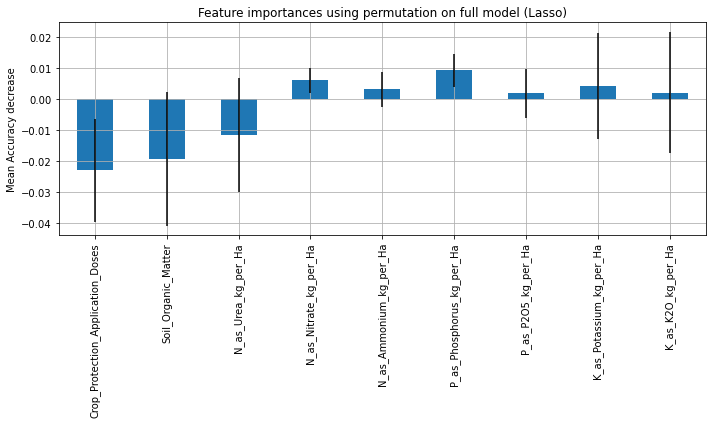

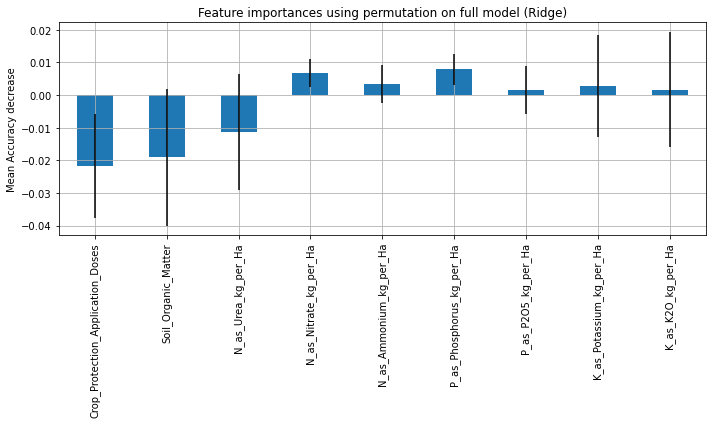

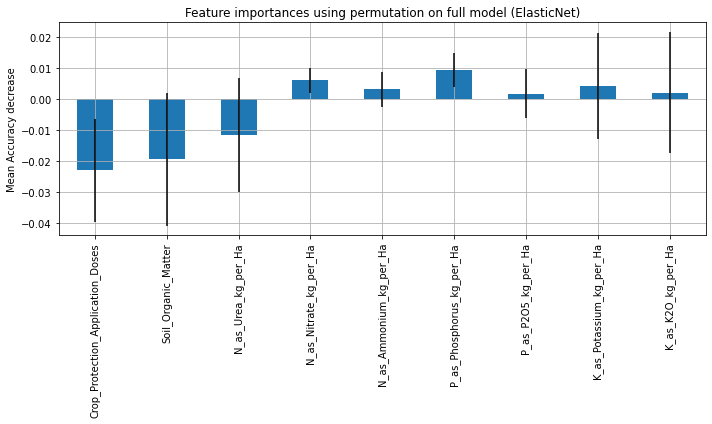

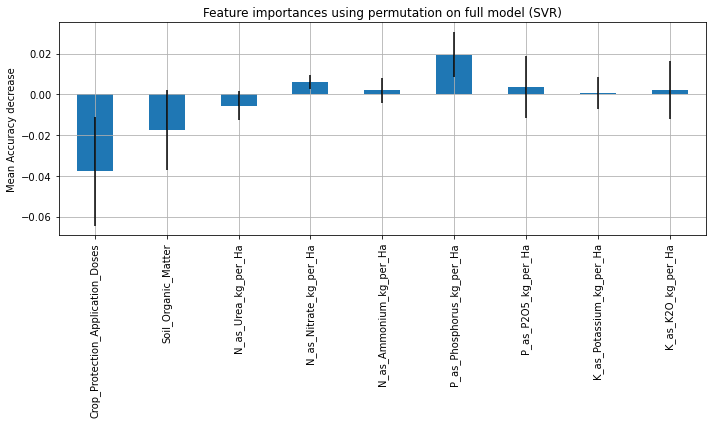

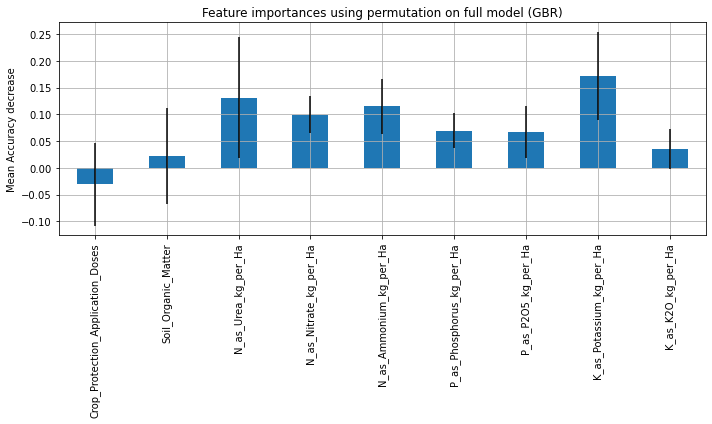

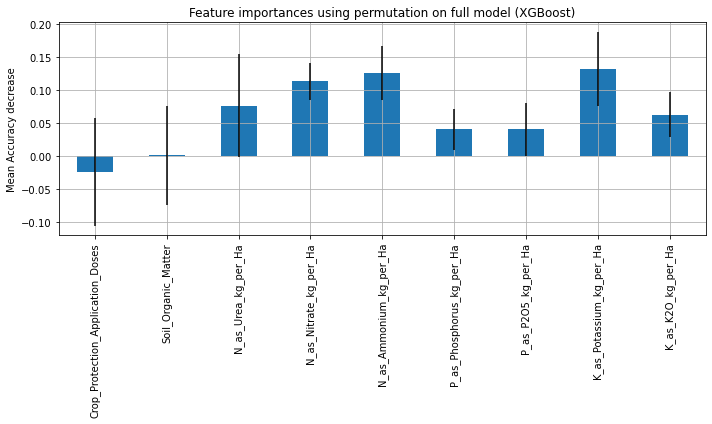

In [177]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [170]:
########################################
### Yield Pred WINTER Elements Split ###
########################################

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = ['Unnamed: 0'])

df = df.drop(columns = ['CO2_kg_per_Ha'])

#filter outliers
df = df[(df['Yield_kg_per_Ha'] > df['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df['Yield_kg_per_Ha'] < df['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_as_Urea_kg_per_Ha,N_as_Nitrate_kg_per_Ha,N_as_Ammonium_kg_per_Ha,P_as_Phosphorus_kg_per_Ha,P_as_P2O5_kg_per_Ha,K_as_Potassium_kg_per_Ha,K_as_K2O_kg_per_Ha
0,14.0,2.500000,3049.333333,0.0,205.5,0.00,48.0,0.0,48.0,0.0
1,18.0,2.500000,3575.055556,138.0,108.0,0.00,108.0,0.0,108.0,0.0
2,13.0,2.500000,3116.200000,138.0,60.0,0.00,60.0,0.0,60.0,0.0
3,9.0,2.500000,7678.888889,151.8,18.0,32.05,90.0,2.6,96.0,0.0
4,9.0,2.500000,7756.363636,128.8,18.0,32.05,90.0,2.6,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...
448,15.0,2.597851,4073.493976,92.0,0.0,0.00,0.0,0.0,0.0,0.0
449,17.0,3.120000,6969.677419,92.0,0.0,0.00,0.0,0.0,0.0,0.0
450,19.0,2.930000,6969.636364,92.0,0.0,0.00,0.0,0.0,0.0,0.0
451,17.0,3.240000,7954.666667,207.0,0.0,0.00,0.0,0.0,0.0,0.0


None


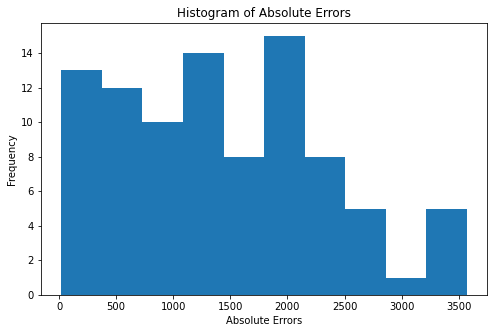

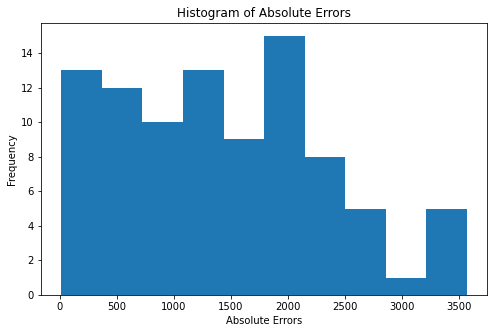

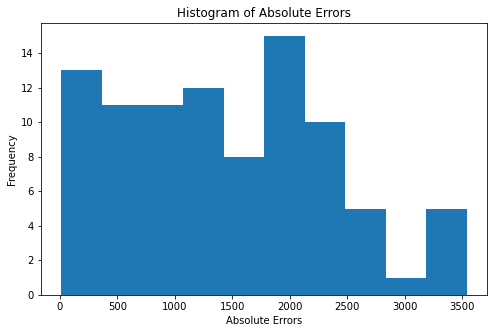

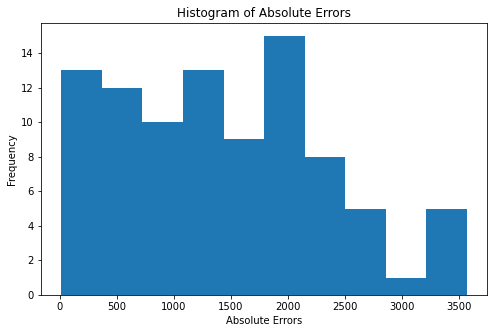

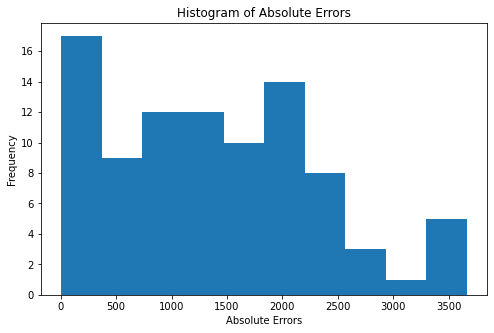

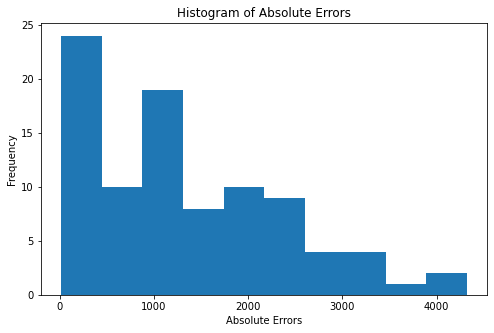

[20:24:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


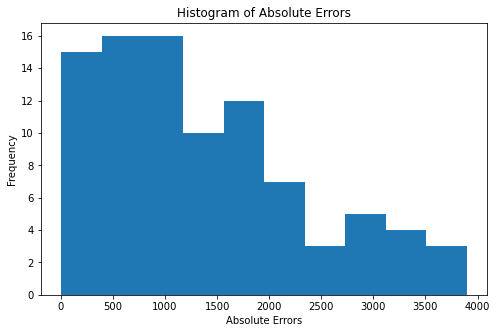

In [171]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                   LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                 bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()

OLS
MAE on test data: 1437.0339447093852
RMSE on test data: 1706.801197403677
R squared on test data: -0.006660759561549767
MAPE on test data: 25.442943744379566


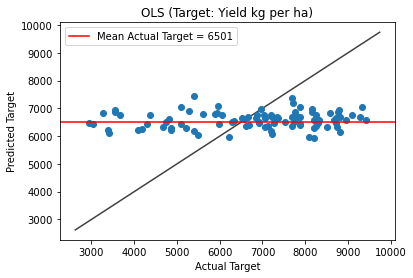

Lasso
MAE on test data: 1435.6107325062642
RMSE on test data: 1705.0103230260484
R squared on test data: -0.004549374636910963
MAPE on test data: 25.4216442504865


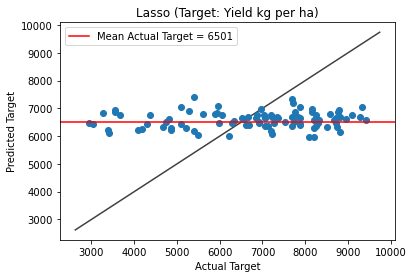

Ridge
MAE on test data: 1429.8919697547879
RMSE on test data: 1697.5930856434973
R squared on test data: 0.004171715461947834
MAPE on test data: 25.332516244647103


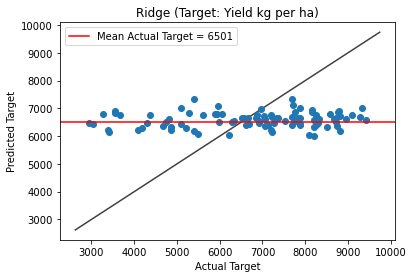

ElasticNet
MAE on test data: 1435.7884376913212
RMSE on test data: 1705.2328233679646
R squared on test data: -0.0048115750004813496
MAPE on test data: 25.424302581023518


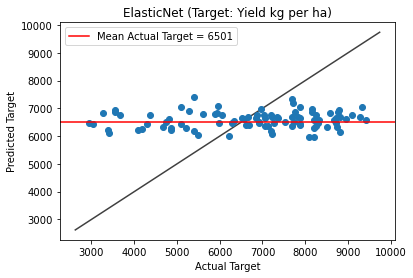

SVR
MAE on test data: 1384.2686288288244
RMSE on test data: 1670.118605127682
R squared on test data: 0.03614458798952125
MAPE on test data: 25.024551766865798


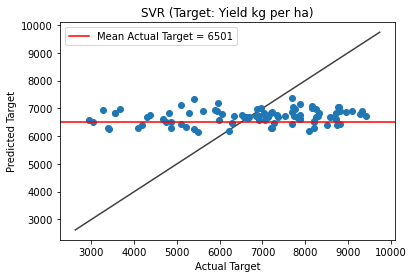

GBR
MAE on test data: 1361.0326749790297
RMSE on test data: 1707.5163773231268
R squared on test data: -0.007504553667835978
MAPE on test data: 21.870246927380833


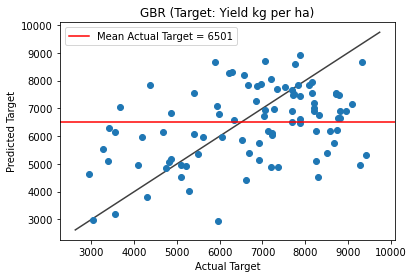

XGBoost
MAE on test data: 1312.2006209400804
RMSE on test data: 1632.254291069082
R squared on test data: 0.0793535135211123
MAPE on test data: 21.179334312521547


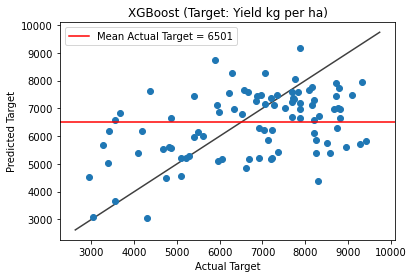

In [172]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

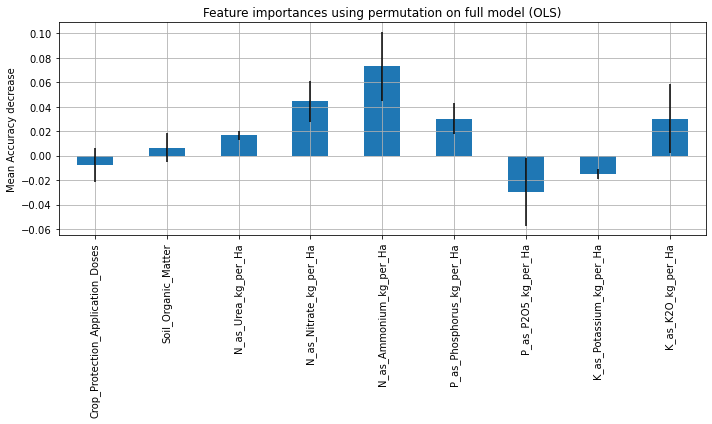

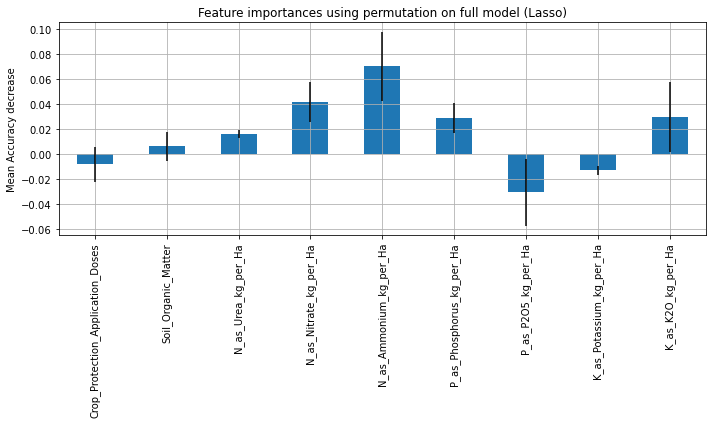

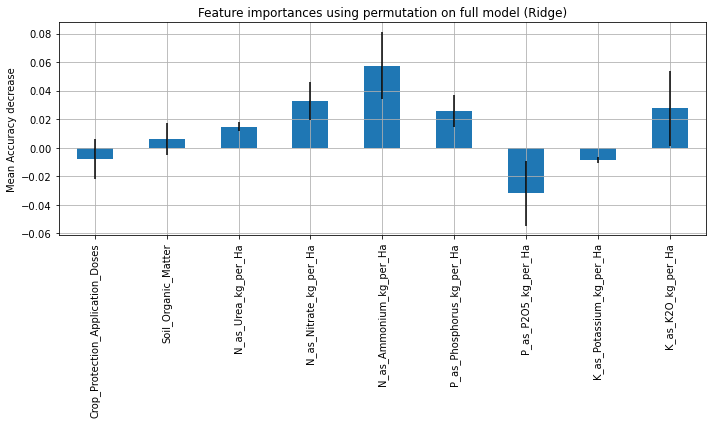

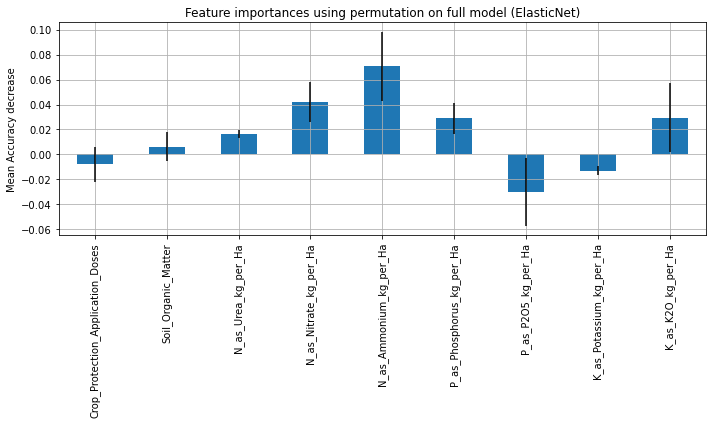

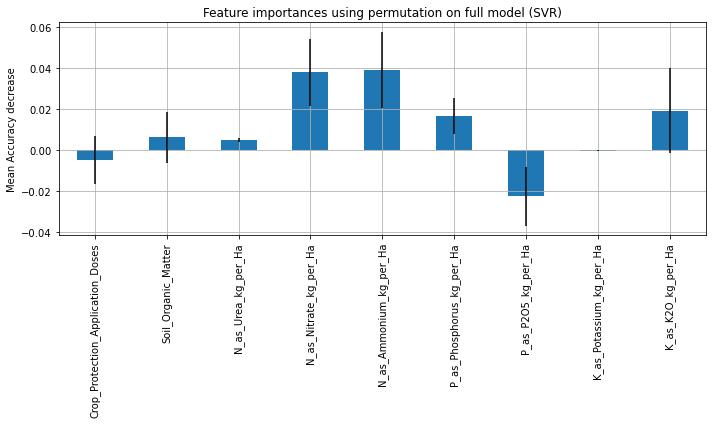

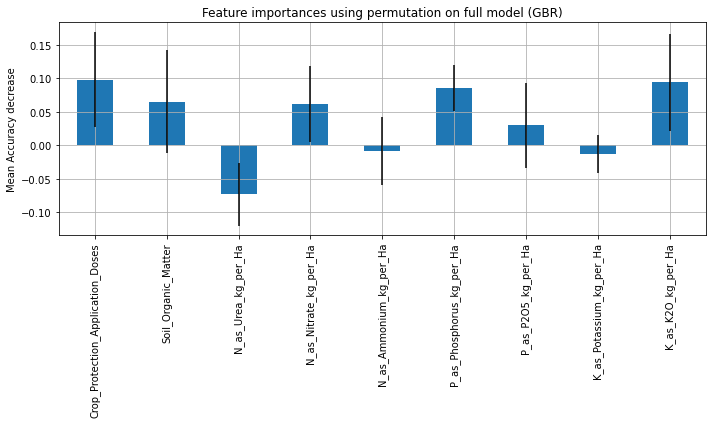

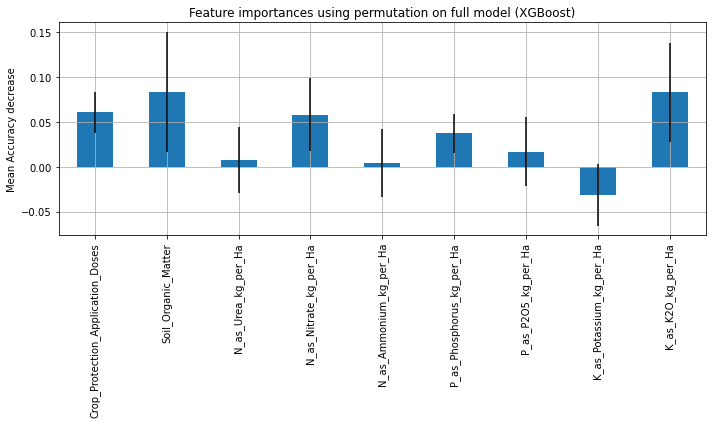

In [173]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [179]:
###########################################
### Yield Pred SUMMER Elements Combined ###
##########################################

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_combined_elements.csv').drop(columns = ['Unnamed: 0'])
print(display(df))

df = df.drop(columns = ['CO2_kg_per_Ha'])
print(display(df))

#filter outliers
df = df[(df['Yield_kg_per_Ha'] > df['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df['Yield_kg_per_Ha'] < df['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,-246.74,14.0,3.690000,7586.243386,170.20,0.0,0.0
1,219.02,20.0,3.380000,7204.924242,87.40,0.0,90.0
2,860.73,18.0,2.681429,11941.555556,74.25,0.0,0.0
3,799.98,17.0,2.681429,10673.777778,74.25,0.0,0.0
4,1426.97,25.0,2.316250,6964.509804,211.88,114.4,120.0
...,...,...,...,...,...,...,...
410,449.67,16.0,2.690000,8992.923077,153.00,114.4,78.0
411,-1035.15,15.0,5.380000,11044.670659,153.00,114.4,78.0
412,-1092.21,13.0,5.380000,10502.634731,153.00,114.4,81.0
413,-427.99,15.0,3.750000,6746.722689,153.00,114.4,81.0


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.0,3.690000,7586.243386,170.20,0.0,0.0
1,20.0,3.380000,7204.924242,87.40,0.0,90.0
2,18.0,2.681429,11941.555556,74.25,0.0,0.0
3,17.0,2.681429,10673.777778,74.25,0.0,0.0
4,25.0,2.316250,6964.509804,211.88,114.4,120.0
...,...,...,...,...,...,...
410,16.0,2.690000,8992.923077,153.00,114.4,78.0
411,15.0,5.380000,11044.670659,153.00,114.4,78.0
412,13.0,5.380000,10502.634731,153.00,114.4,81.0
413,15.0,3.750000,6746.722689,153.00,114.4,81.0


None


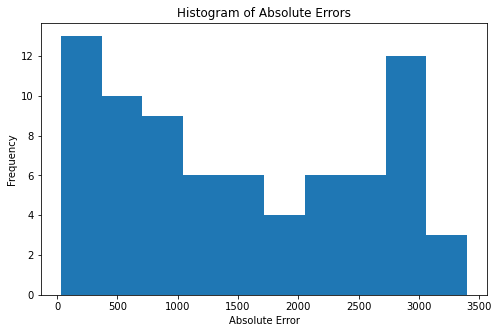

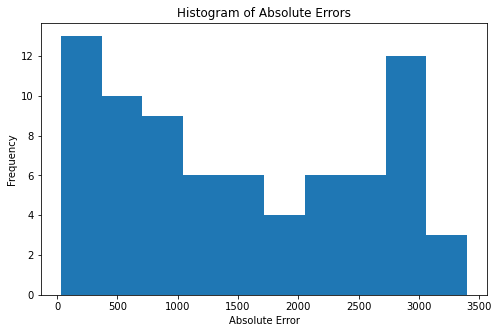

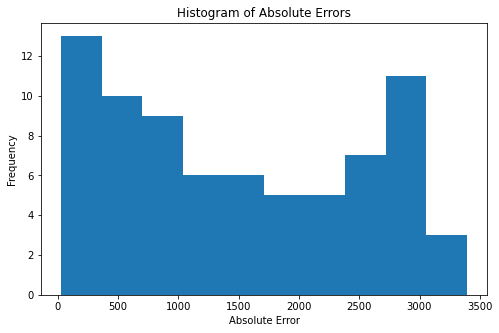

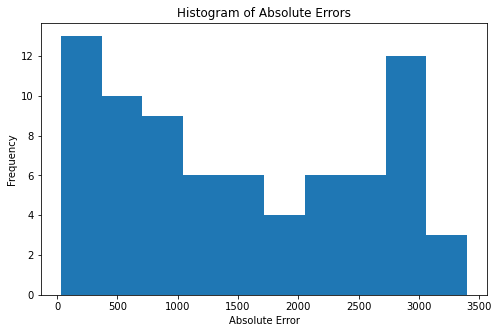

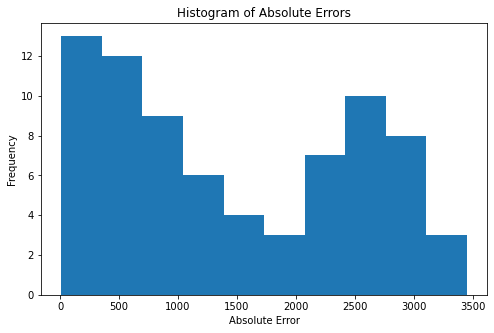

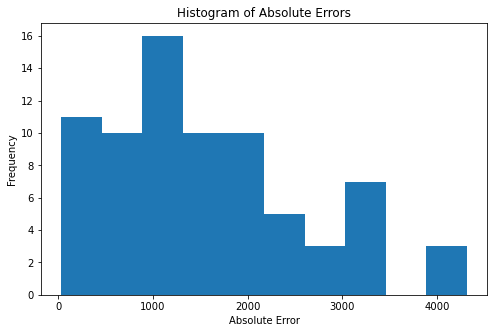

[16:00:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


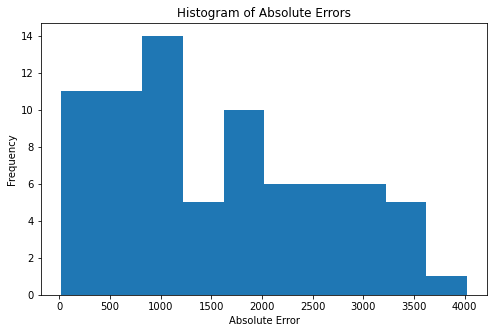

In [99]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                   LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                 bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()

OLS
MAE on test data: 1490.0595944100332
RMSE on test data: 1809.003189820096
R squared on test data: -0.09429057379169636
MAPE on test data: 24.1652746826874


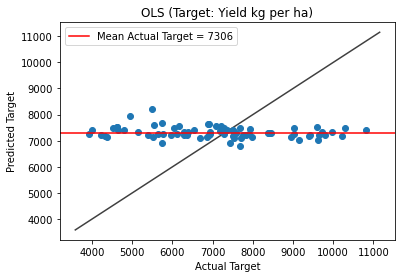

Lasso
MAE on test data: 1489.0707066927828
RMSE on test data: 1808.0267387817846
R squared on test data: -0.09310955565576529
MAPE on test data: 24.149959712724293


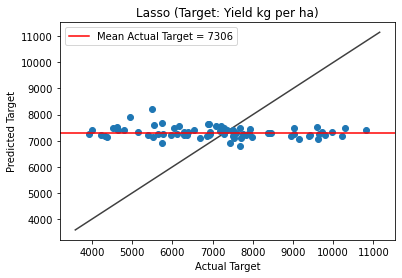

Ridge
MAE on test data: 1485.2660496108401
RMSE on test data: 1804.4063630513176
R squared on test data: -0.08873627397404404
MAPE on test data: 24.08784009751042


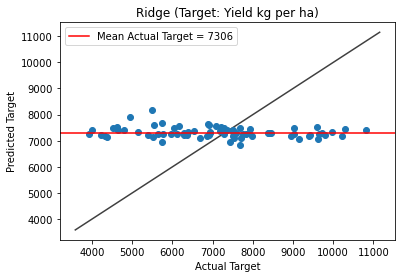

ElasticNet
MAE on test data: 1489.1943516667009
RMSE on test data: 1808.1485471894523
R squared on test data: -0.09325684818937763
MAPE on test data: 24.151874585562364


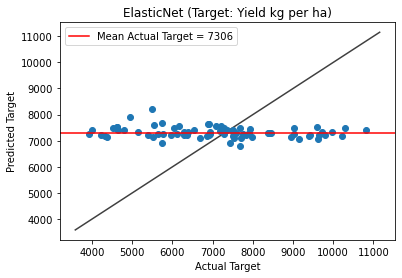

SVR
MAE on test data: 1489.9543802718727
RMSE on test data: 1822.8505154254306
R squared on test data: -0.11110756292705726
MAPE on test data: 24.00276537706642


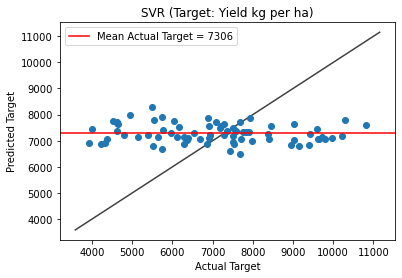

GBR
MAE on test data: 1539.6678863705622
RMSE on test data: 1856.4735788918235
R squared on test data: -0.152475066945724
MAPE on test data: 23.522754055794426


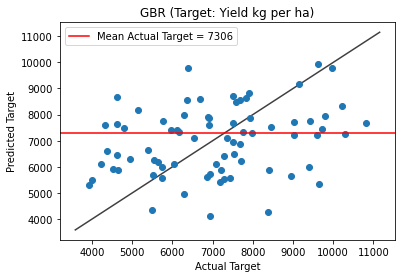

XGBoost
MAE on test data: 1566.813907631518
RMSE on test data: 1877.7341471234786
R squared on test data: -0.17902279338586524
MAPE on test data: 24.638372701884258


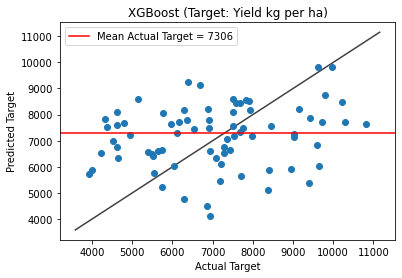

In [100]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

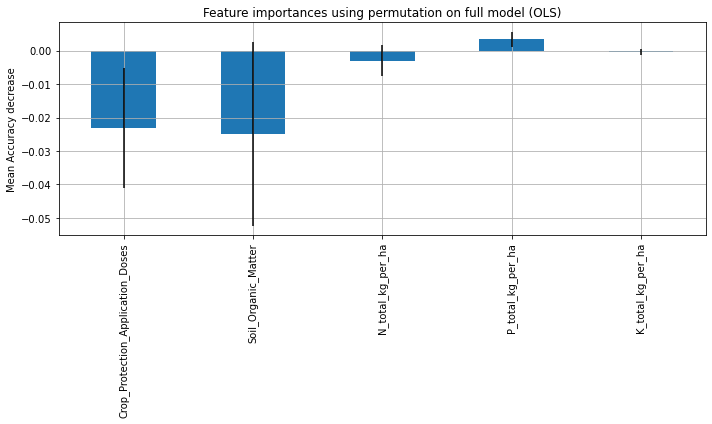

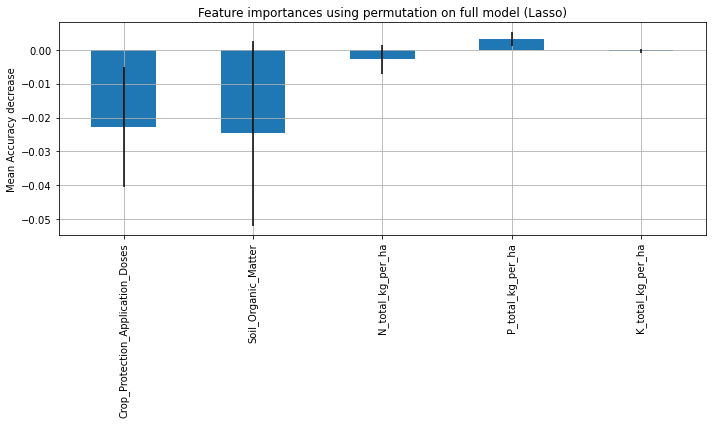

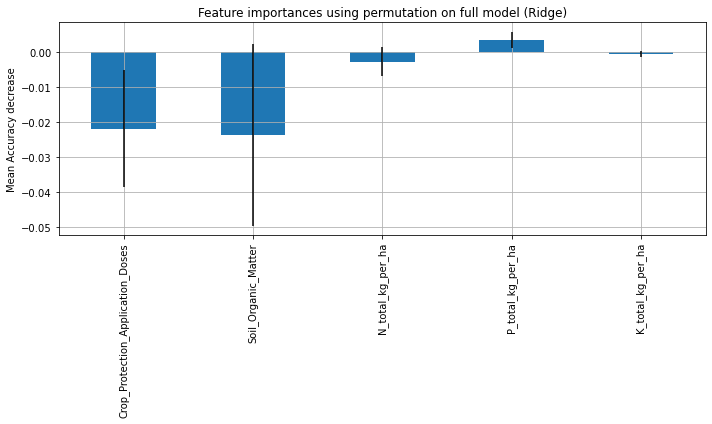

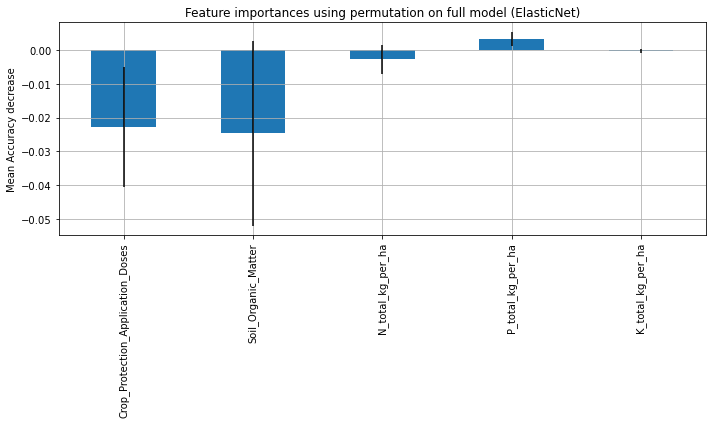

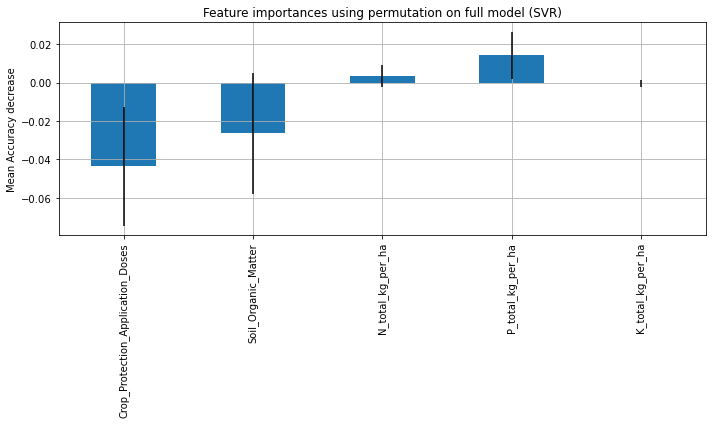

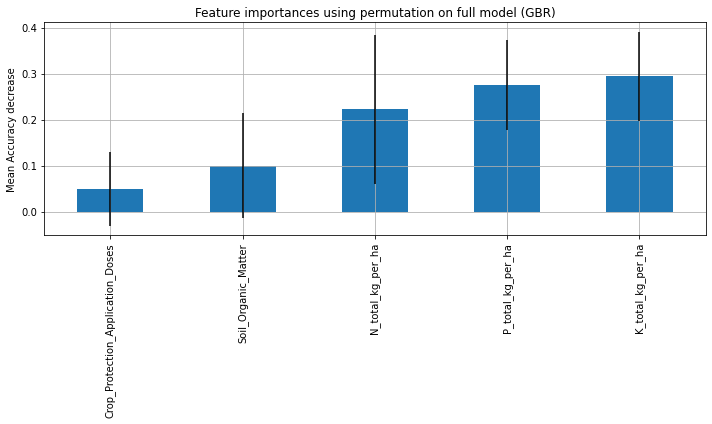

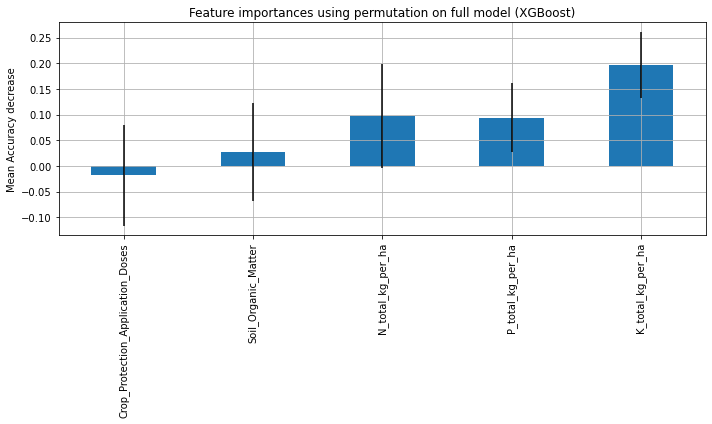

In [101]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [180]:
###########################################
### Yield Pred WINTER Elements Combined ###
##########################################

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_combined_elements.csv').drop(columns = ['Unnamed: 0'])
print(display(df))

df = df.drop(columns = ['CO2_kg_per_Ha'])
print(display(df))

#filter outliers
df = df[(df['Yield_kg_per_Ha'] > df['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df['Yield_kg_per_Ha'] < df['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,-220.35,14.0,2.500000,3049.333333,205.50,48.0,48.0
1,3847.21,18.0,2.500000,3575.055556,246.00,108.0,108.0
2,415.52,13.0,2.500000,3116.200000,198.00,60.0,60.0
3,724.51,9.0,2.500000,7678.888889,201.85,92.6,96.0
4,502.10,9.0,2.500000,7756.363636,178.85,92.6,90.0
...,...,...,...,...,...,...,...
500,-239.89,15.0,2.597851,4073.493976,92.00,0.0,0.0
501,314.80,17.0,3.120000,6969.677419,92.00,0.0,0.0
502,-312.82,19.0,2.930000,6969.636364,92.00,0.0,0.0
503,485.73,17.0,3.240000,7954.666667,207.00,0.0,0.0


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.0,2.500000,3049.333333,205.50,48.0,48.0
1,18.0,2.500000,3575.055556,246.00,108.0,108.0
2,13.0,2.500000,3116.200000,198.00,60.0,60.0
3,9.0,2.500000,7678.888889,201.85,92.6,96.0
4,9.0,2.500000,7756.363636,178.85,92.6,90.0
...,...,...,...,...,...,...
500,15.0,2.597851,4073.493976,92.00,0.0,0.0
501,17.0,3.120000,6969.677419,92.00,0.0,0.0
502,19.0,2.930000,6969.636364,92.00,0.0,0.0
503,17.0,3.240000,7954.666667,207.00,0.0,0.0


None


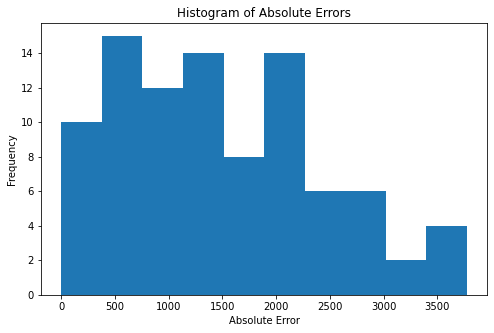

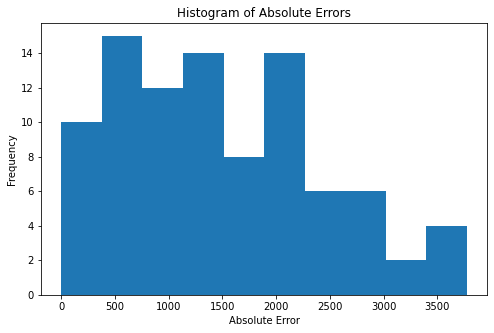

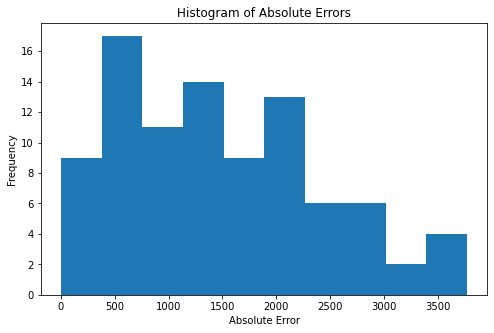

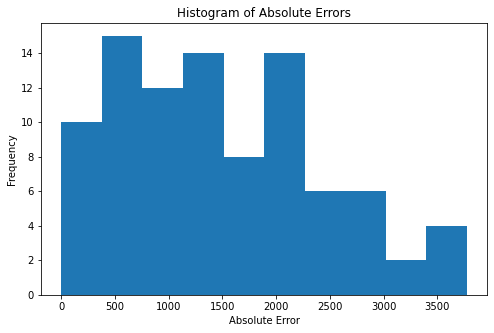

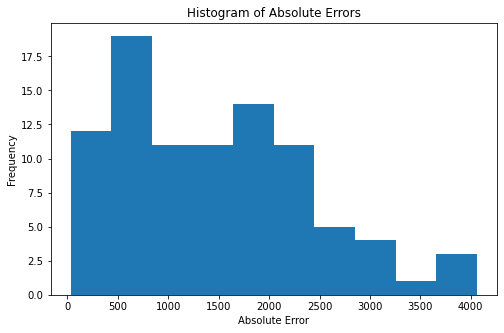

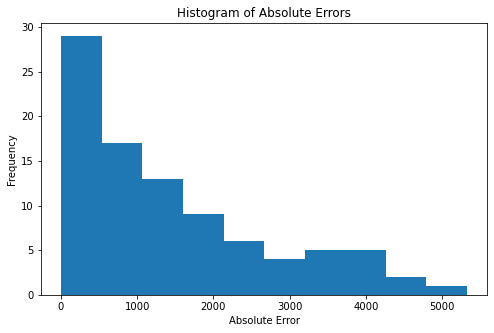

[16:00:36] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


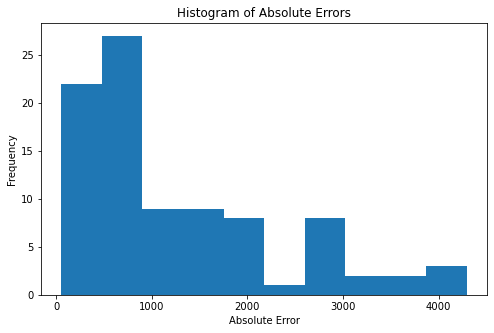

In [103]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                   LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                 bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()

OLS
MAE on test data: 1476.9966462133918
RMSE on test data: 1752.4577069542954
R squared on test data: -0.06123692720491558
MAPE on test data: 24.1652746826874


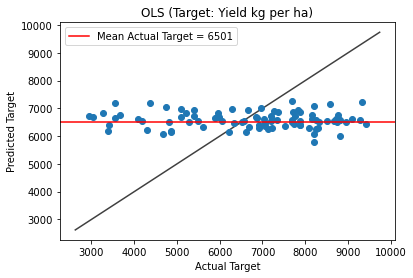

Lasso
MAE on test data: 1476.6939021680587
RMSE on test data: 1752.2086095693828
R squared on test data: -0.06093525652309473
MAPE on test data: 24.149959712724293


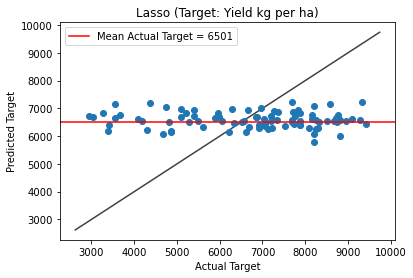

Ridge
MAE on test data: 1474.483061516916
RMSE on test data: 1749.5746824586697
R squared on test data: -0.05774804944826317
MAPE on test data: 24.08784009751042


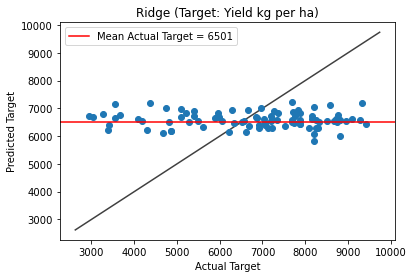

ElasticNet
MAE on test data: 1476.7317250164206
RMSE on test data: 1752.2394622968695
R squared on test data: -0.06097261855219238
MAPE on test data: 24.151874585562364


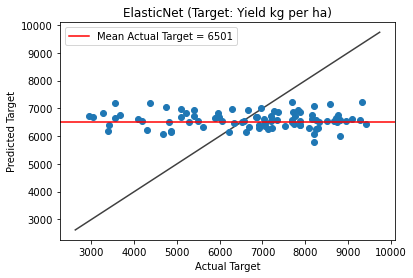

SVR
MAE on test data: 1472.7375341368463
RMSE on test data: 1763.7002150128944
R squared on test data: -0.07489686878562773
MAPE on test data: 24.00276537706642


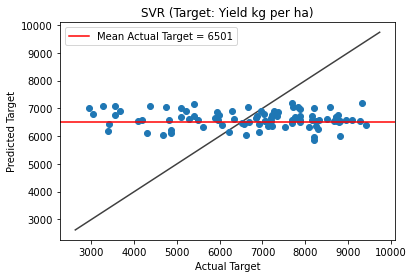

GBR
MAE on test data: 1436.1174647006187
RMSE on test data: 1917.1682847908378
R squared on test data: -0.2700994676190538
MAPE on test data: 23.522754055794426


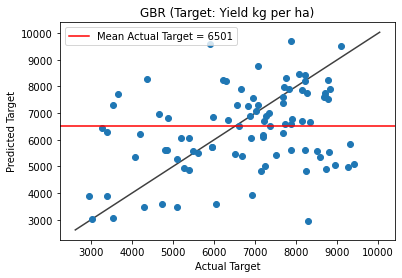

XGBoost
MAE on test data: 1248.1344998569164
RMSE on test data: 1619.2677389982455
R squared on test data: 0.09394494244862506
MAPE on test data: 24.638372701884258


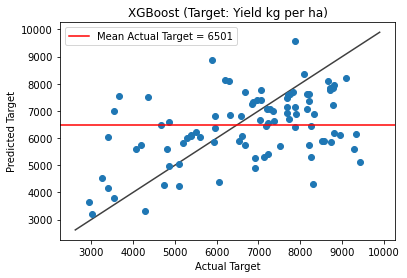

In [104]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

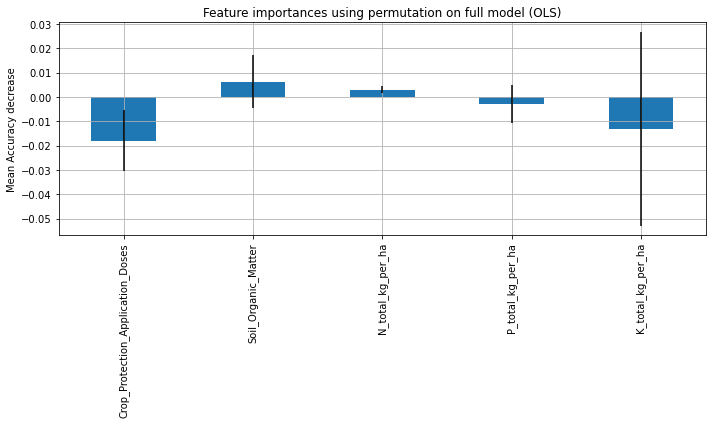

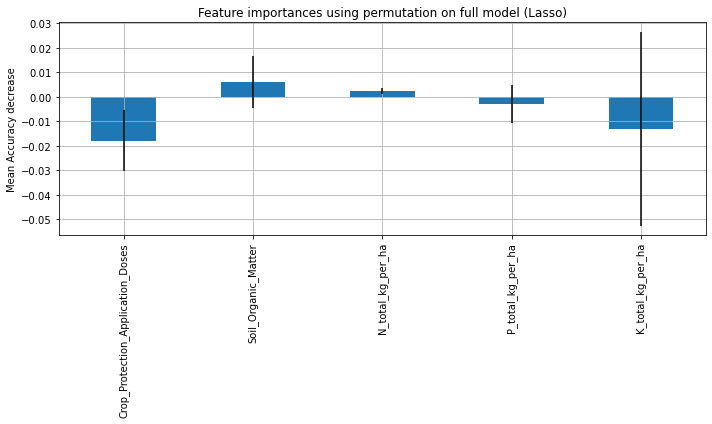

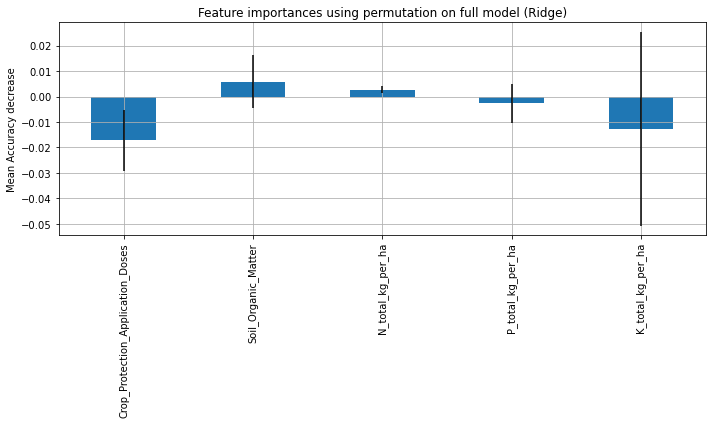

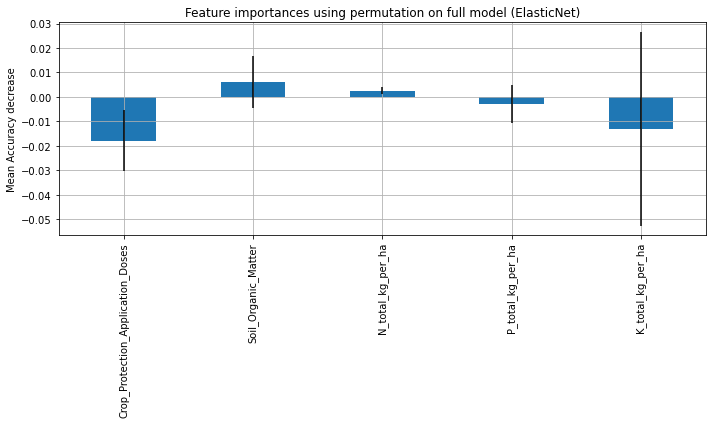

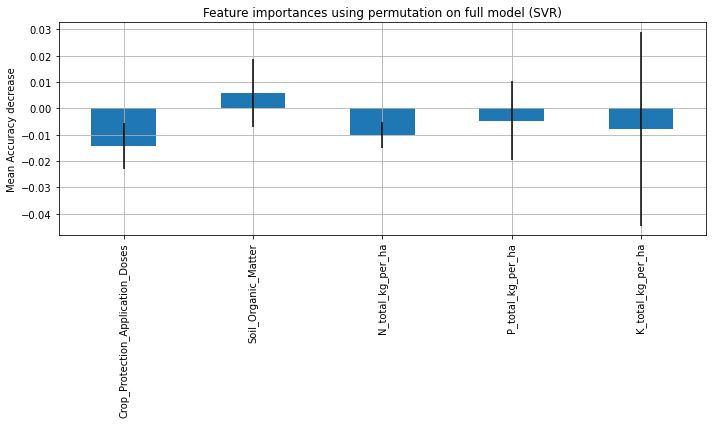

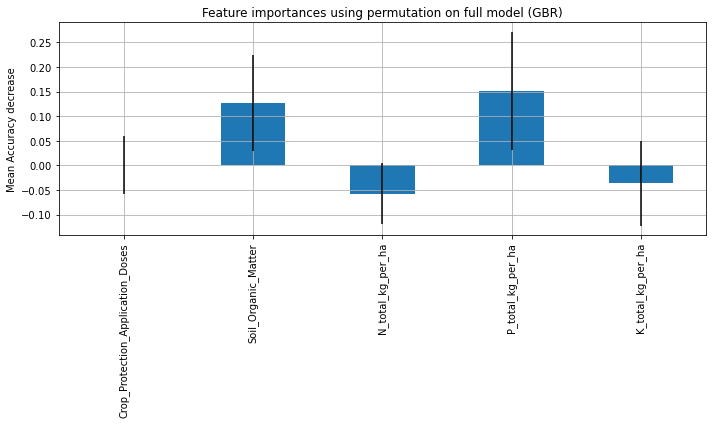

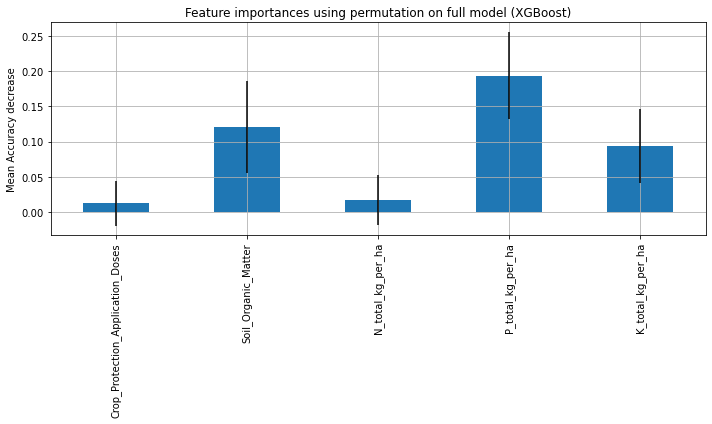

In [105]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Expanded Data

In [133]:
print(display(df))
n = 6

means = np.array(df.mean().values)
variances = np.array(df.var().values)

X = np.random.normal(loc=0, scale=1, size=(n, n))

C = np.diag(variances)
C[np.triu_indices(n, k=1)] = np.random.uniform(low=0, high=1, size=(n*(n-1)//2))

x = np.random.multivariate_normal(means, C, (500))

extra_data = pd.DataFrame(x, columns = df.columns)

expanded_data = pd.concat([df, extra_data]).reset_index(drop = True)
print(display(expanded_data))

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.0,2.500000,3049.333333,205.50,48.0,48.0
1,18.0,2.500000,3575.055556,246.00,108.0,108.0
2,13.0,2.500000,3116.200000,198.00,60.0,60.0
3,9.0,2.500000,7678.888889,201.85,92.6,96.0
4,9.0,2.500000,7756.363636,178.85,92.6,90.0
...,...,...,...,...,...,...
448,15.0,2.597851,4073.493976,92.00,0.0,0.0
449,17.0,3.120000,6969.677419,92.00,0.0,0.0
450,19.0,2.930000,6969.636364,92.00,0.0,0.0
451,17.0,3.240000,7954.666667,207.00,0.0,0.0


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,11.785456,2.952153,5803.565914,57.775320,118.683828,90.703381
1,11.779868,2.404850,6858.299869,0.854824,170.320352,161.045104
2,18.442657,2.823103,7617.379102,77.762428,142.342586,125.668466
3,16.341815,2.204070,7378.838610,170.418892,61.861391,99.853486
4,14.931027,2.641270,8413.007014,71.021216,49.429800,139.488335
...,...,...,...,...,...,...
495,18.577986,2.933052,6218.601606,110.396261,127.481863,28.796268
496,17.960401,2.917901,6724.455818,64.637412,105.243249,87.444915
497,14.470640,1.285201,3468.419405,-17.625921,55.047211,106.331346
498,22.692736,2.156081,6078.264614,200.342755,6.668065,88.968440


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.000000,2.500000,3049.333333,205.500000,48.000000,48.000000
1,18.000000,2.500000,3575.055556,246.000000,108.000000,108.000000
2,13.000000,2.500000,3116.200000,198.000000,60.000000,60.000000
3,9.000000,2.500000,7678.888889,201.850000,92.600000,96.000000
4,9.000000,2.500000,7756.363636,178.850000,92.600000,90.000000
...,...,...,...,...,...,...
948,18.577986,2.933052,6218.601606,110.396261,127.481863,28.796268
949,17.960401,2.917901,6724.455818,64.637412,105.243249,87.444915
950,14.470640,1.285201,3468.419405,-17.625921,55.047211,106.331346
951,22.692736,2.156081,6078.264614,200.342755,6.668065,88.968440


None


In [160]:
###########################################
### Yield Pred WINTER Elements Combined ###
##########################################

df = pd.read_csv('/mnt/Datasets/merged_df_wet_3_20_23_with_season.csv')
df = df[df['Season'] == 'WINTER'].reset_index(drop = True)

df['N_total_kg_per_ha'] = df['N_as_Urea_kg_per_Ha'] + df['N_as_Ammonium_kg_per_Ha'] + df['N_as_Nitrate_kg_per_Ha']
df['P_total_kg_per_ha'] = df['P_as_Phosphorus_kg_per_Ha'] + df['P_as_P2O5_kg_per_Ha'] 
df['K_total_kg_per_ha'] = df['K_as_Potassium_kg_per_Ha'] + df['K_as_K2O_kg_per_Ha']

df = df.drop(columns = ['Harvest Year', 'Total_Water_Applied_mm', 'Field_Name', 'CO2_kg_per_Ha', 'Enter Total Wet Mass Harvested (kg)', 'Enter Crop Area (ha)', 'Unnamed: 0', \
                        'N_as_Urea_kg_per_Ha', 'N_as_Ammonium_kg_per_Ha', 'N_as_Nitrate_kg_per_Ha', 'P_as_Phosphorus_kg_per_Ha', 'P_as_P2O5_kg_per_Ha', \
                        'K_as_Potassium_kg_per_Ha', 'K_as_K2O_kg_per_Ha', 'Season', 'Yield_kg_per_Ha_Dry', 'Enter Dry Finished Yield Mass (kg)'])

print(display(df))

#filter outliers
df = df[(df['Yield_kg_per_Ha'] > df['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df['Yield_kg_per_Ha'] < df['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

n = 6

means = np.array(df.mean().values)
variances = np.array(df.var().values)

X = np.random.normal(loc=0, scale=1, size=(n, n))

C = np.diag(variances)
C[np.triu_indices(n, k=1)] = np.random.uniform(low=0, high=1, size=(n*(n-1)//2))

x = np.random.multivariate_normal(means, C, (5000))

extra_data = pd.DataFrame(x, columns = df.columns)

expanded_data = pd.concat([df, extra_data]).reset_index(drop = True)

print(display(expanded_data))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(expanded_data, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.0,2.500000,3049.333333,205.50,48.0,48.0
1,18.0,2.500000,3575.055556,246.00,108.0,108.0
2,13.0,2.500000,3116.200000,198.00,60.0,60.0
3,9.0,2.500000,7678.888889,201.85,92.6,96.0
4,9.0,2.500000,7756.363636,178.85,92.6,90.0
...,...,...,...,...,...,...
500,15.0,2.597851,4073.493976,92.00,0.0,0.0
501,17.0,3.120000,6969.677419,92.00,0.0,0.0
502,19.0,2.930000,6969.636364,92.00,0.0,0.0
503,17.0,3.240000,7954.666667,207.00,0.0,0.0


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.000000,2.500000,3049.333333,205.500000,48.000000,48.000000
1,18.000000,2.500000,3575.055556,246.000000,108.000000,108.000000
2,13.000000,2.500000,3116.200000,198.000000,60.000000,60.000000
3,9.000000,2.500000,7678.888889,201.850000,92.600000,96.000000
4,9.000000,2.500000,7756.363636,178.850000,92.600000,90.000000
...,...,...,...,...,...,...
5448,13.759173,2.450156,6223.666359,152.729533,111.967717,5.404382
5449,17.243944,2.263795,5964.400727,-19.874753,37.157938,95.599494
5450,21.073726,3.207376,6207.347845,89.784347,78.475455,62.176780
5451,12.425690,2.738454,7269.376488,68.924211,37.404044,19.354421


None


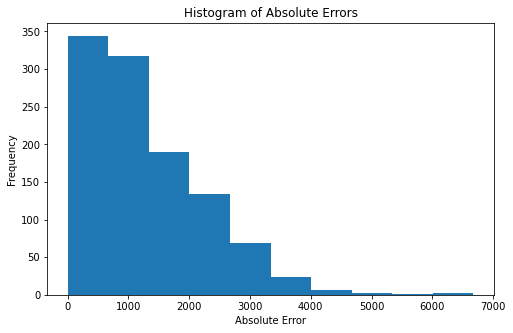

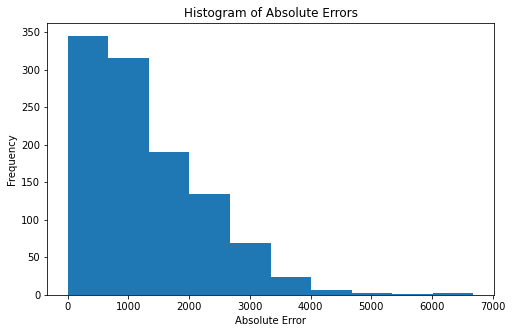

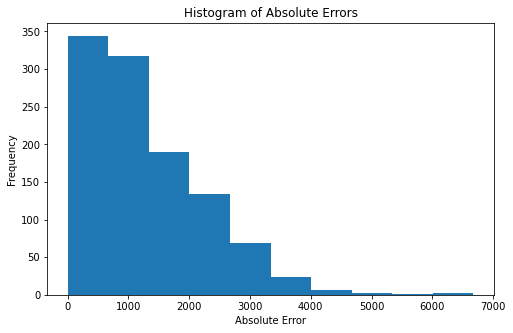

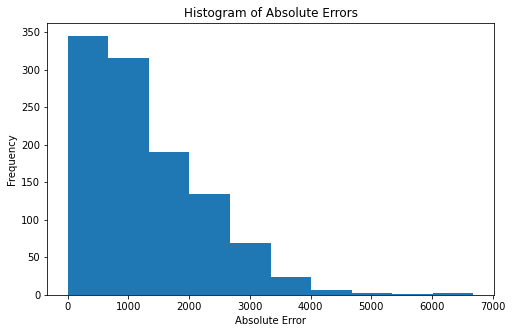

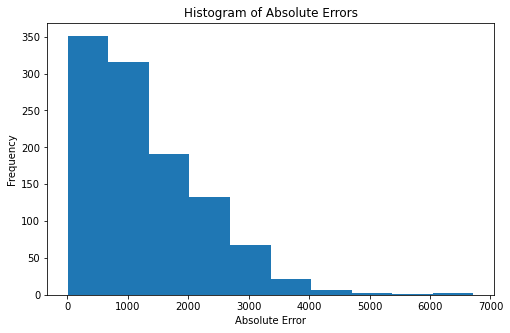

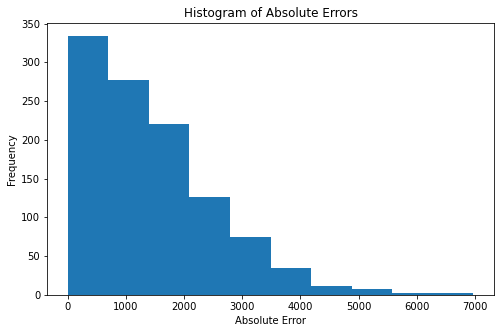

[19:00:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


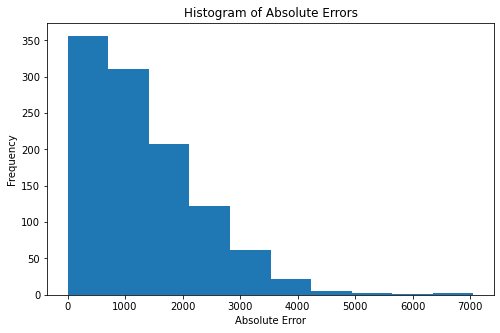

In [161]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                   LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                 bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()

OLS
MAE on test data: 1283.5338377473367
RMSE on test data: 1613.263005450409
R squared on test data: -0.0013735260503975333
MAPE on test data: 24.1652746826874


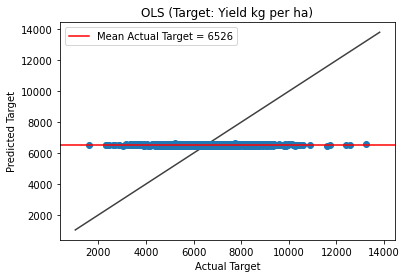

Lasso
MAE on test data: 1283.6023766648307
RMSE on test data: 1613.274961621778
R squared on test data: -0.001388368810451679
MAPE on test data: 24.149959712724293


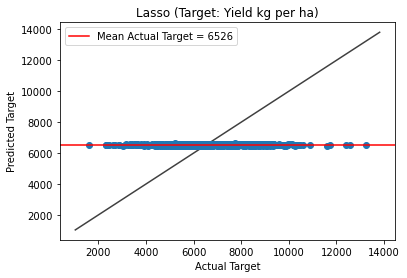

Ridge
MAE on test data: 1283.53791794236
RMSE on test data: 1613.2621763479704
R squared on test data: -0.0013724967811259425
MAPE on test data: 24.08784009751042


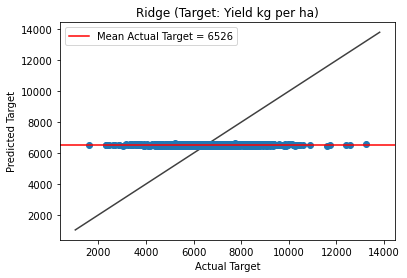

ElasticNet
MAE on test data: 1283.5926760636637
RMSE on test data: 1613.273189813963
R squared on test data: -0.001386169226616829
MAPE on test data: 24.151874585562364


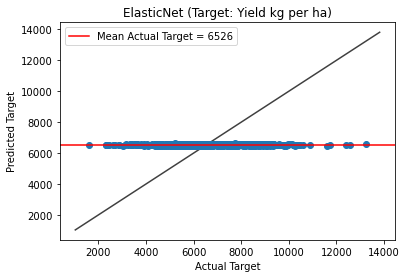

SVR
MAE on test data: 1285.1331794533864
RMSE on test data: 1615.0921035303822
R squared on test data: -0.0036455036715254963
MAPE on test data: 24.00276537706642


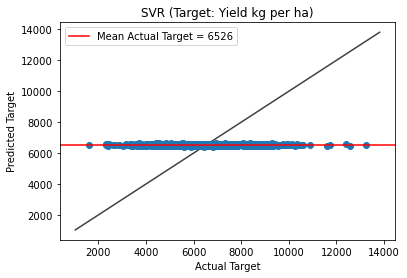

GBR
MAE on test data: 1434.152672657658
RMSE on test data: 1816.9511439194152
R squared on test data: -0.2702004290820115
MAPE on test data: 23.522754055794426


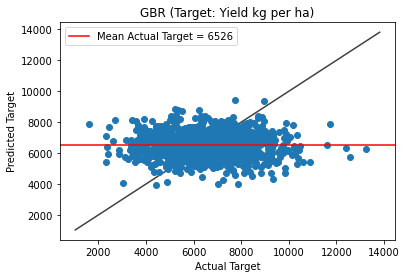

XGBoost
MAE on test data: 1331.262950247487
RMSE on test data: 1674.4825499427411
R squared on test data: -0.07881507820508249
MAPE on test data: 24.638372701884258


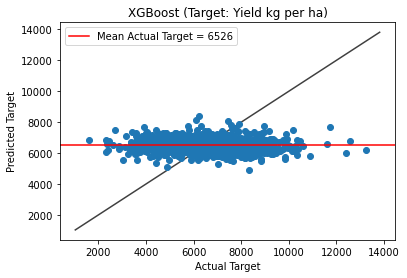

In [162]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

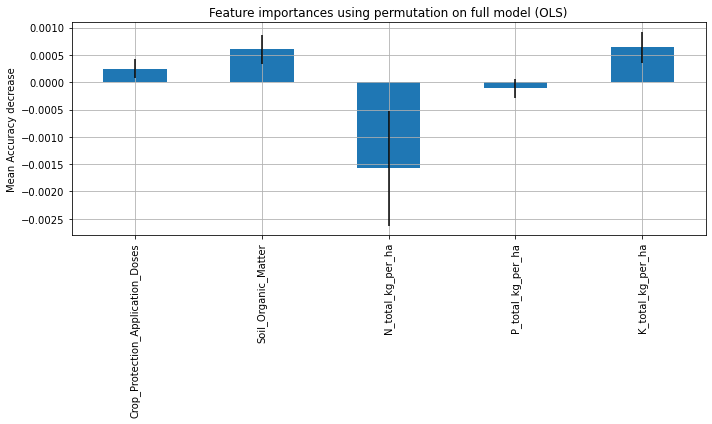

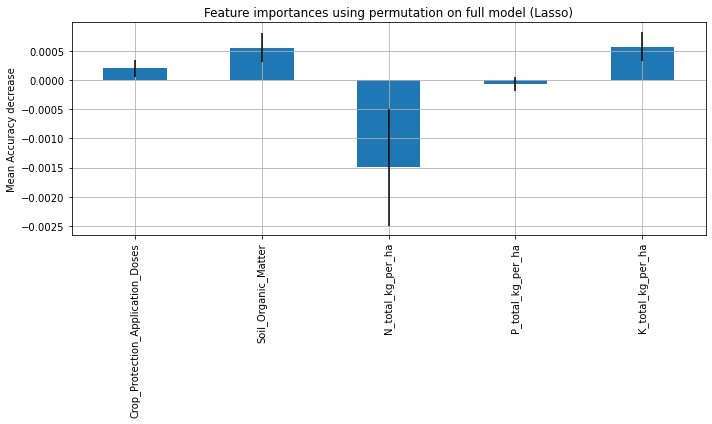

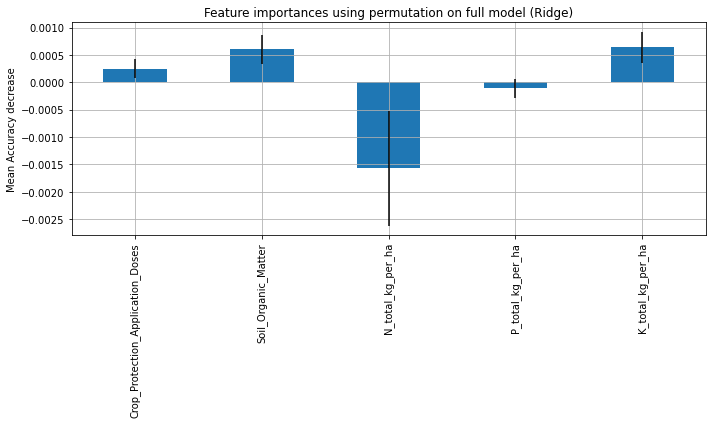

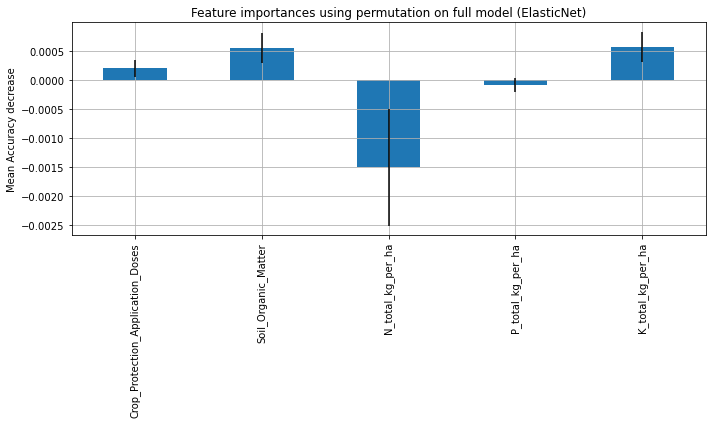

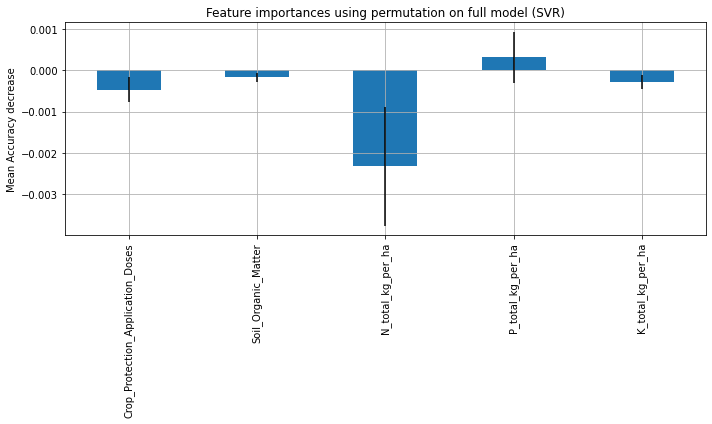

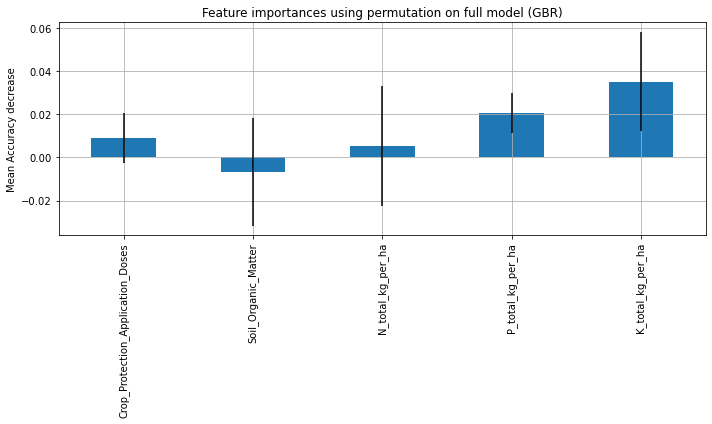

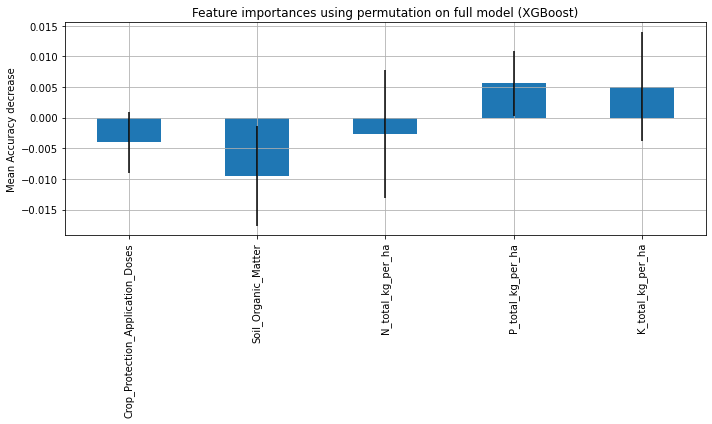

In [163]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [156]:
###########################################
### Yield Pred WINTER Elements Combined ###
##########################################

df = pd.read_csv('/mnt/Datasets/merged_df_wet_3_20_23_with_season.csv')
df = df[df['Season'] == 'SUMMER'].reset_index(drop = True)

df['N_total_kg_per_ha'] = df['N_as_Urea_kg_per_Ha'] + df['N_as_Ammonium_kg_per_Ha'] + df['N_as_Nitrate_kg_per_Ha']
df['P_total_kg_per_ha'] = df['P_as_Phosphorus_kg_per_Ha'] + df['P_as_P2O5_kg_per_Ha'] 
df['K_total_kg_per_ha'] = df['K_as_Potassium_kg_per_Ha'] + df['K_as_K2O_kg_per_Ha']

df = df.drop(columns = ['Harvest Year', 'Total_Water_Applied_mm', 'Field_Name', 'CO2_kg_per_Ha', 'Enter Total Wet Mass Harvested (kg)', 'Enter Crop Area (ha)', 'Unnamed: 0', \
                        'N_as_Urea_kg_per_Ha', 'N_as_Ammonium_kg_per_Ha', 'N_as_Nitrate_kg_per_Ha', 'P_as_Phosphorus_kg_per_Ha', 'P_as_P2O5_kg_per_Ha', \
                        'K_as_Potassium_kg_per_Ha', 'K_as_K2O_kg_per_Ha', 'Season', 'Yield_kg_per_Ha_Dry', 'Enter Dry Finished Yield Mass (kg)'])

print(display(df))

#filter outliers
df = df[(df['Yield_kg_per_Ha'] > df['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df['Yield_kg_per_Ha'] < df['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

n = 6

means = np.array(df.mean().values)
variances = np.array(df.var().values)

X = np.random.normal(loc=0, scale=1, size=(n, n))

C = np.diag(variances)
C[np.triu_indices(n, k=1)] = np.random.uniform(low=0, high=1, size=(n*(n-1)//2))

x = np.random.multivariate_normal(means, C, (5000))

extra_data = pd.DataFrame(x, columns = df.columns)

expanded_data = pd.concat([df, extra_data]).reset_index(drop = True)

print(display(expanded_data))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(expanded_data, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.0,3.690000,7586.243386,170.20,0.0,0.0
1,20.0,3.380000,7204.924242,87.40,0.0,90.0
2,18.0,2.681429,11941.555556,74.25,0.0,0.0
3,17.0,2.681429,10673.777778,74.25,0.0,0.0
4,25.0,2.316250,6964.509804,211.88,114.4,120.0
...,...,...,...,...,...,...
410,16.0,2.690000,8992.923077,153.00,114.4,78.0
411,15.0,5.380000,11044.670659,153.00,114.4,78.0
412,13.0,5.380000,10502.634731,153.00,114.4,81.0
413,15.0,3.750000,6746.722689,153.00,114.4,81.0


None


,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,14.000000,3.690000,7586.243386,170.200000,0.000000,0.000000
1,20.000000,3.380000,7204.924242,87.400000,0.000000,90.000000
2,17.000000,2.681429,10673.777778,74.250000,0.000000,0.000000
3,25.000000,2.316250,6964.509804,211.880000,114.400000,120.000000
4,15.000000,3.050000,6791.805556,23.000000,75.900000,0.000000
...,...,...,...,...,...,...
5368,18.095275,3.072900,5076.074585,74.885582,195.133414,73.556709
5369,9.618610,1.018644,10291.477099,151.717927,71.259919,72.008806
5370,10.673625,1.830787,8048.335903,47.888001,114.556275,71.545166
5371,11.600389,3.793383,4744.371529,217.032901,69.687483,109.269518


None


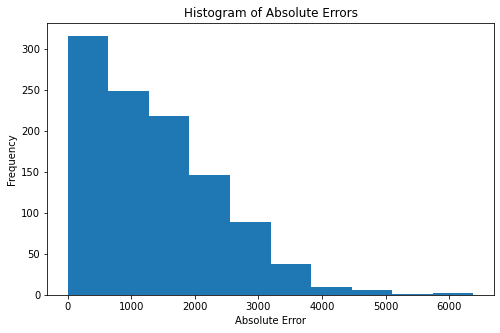

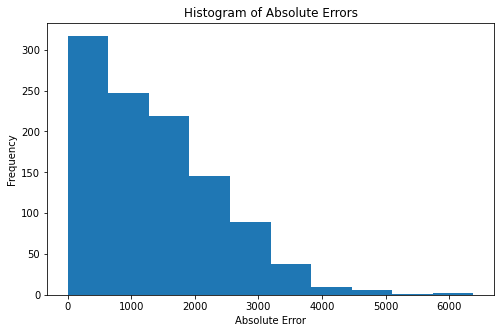

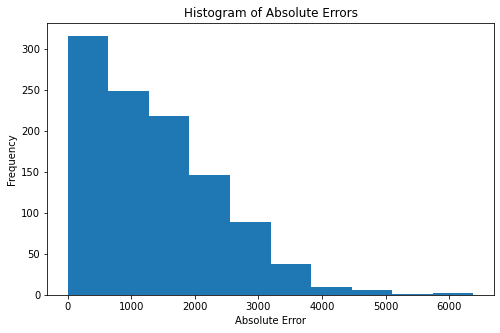

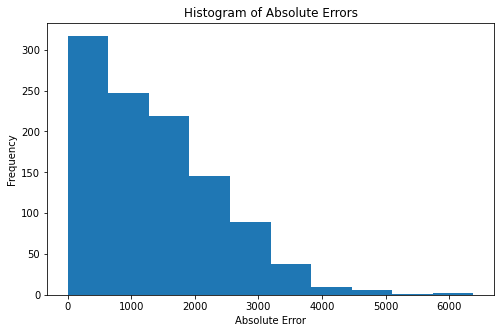

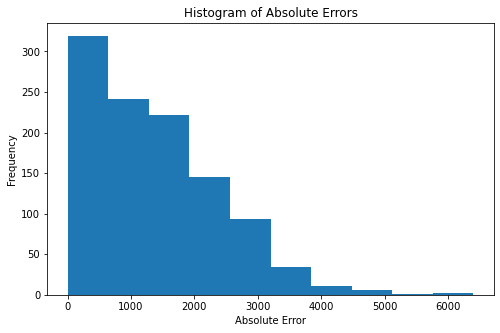

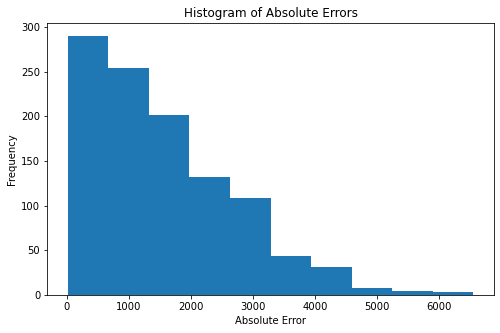

[18:59:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


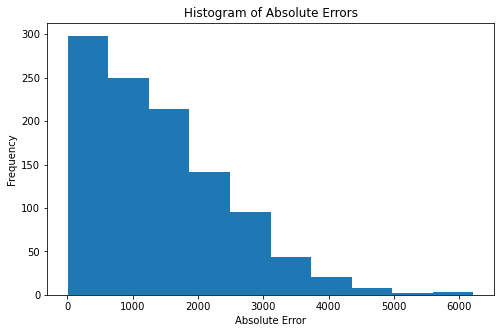

In [157]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                   LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                 bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()

OLS
MAE on test data: 1380.6856550606717
RMSE on test data: 1718.5969660396804
R squared on test data: -0.0005074372568871777
MAPE on test data: 24.1652746826874


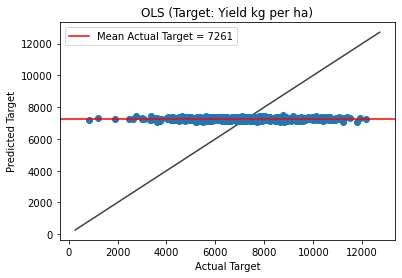

Lasso
MAE on test data: 1380.641711157677
RMSE on test data: 1718.4564448731023
R squared on test data: -0.00034383086486355907
MAPE on test data: 24.149959712724293


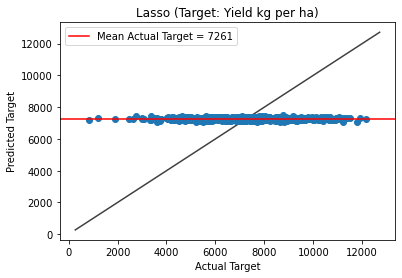

Ridge
MAE on test data: 1380.6881354359793
RMSE on test data: 1718.5917542978798
R squared on test data: -0.0005013690761219713
MAPE on test data: 24.08784009751042


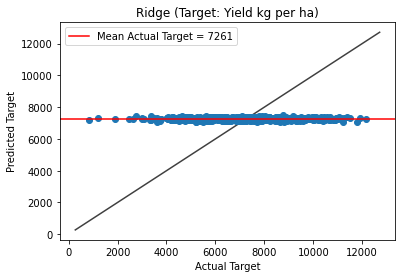

ElasticNet
MAE on test data: 1380.647096184003
RMSE on test data: 1718.4737076137978
R squared on test data: -0.000363928857973983
MAPE on test data: 24.151874585562364


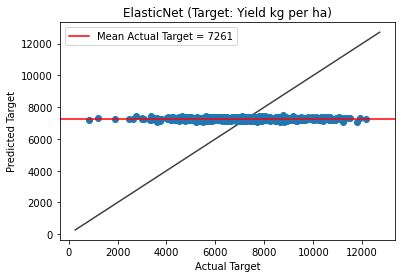

SVR
MAE on test data: 1381.6665313696415
RMSE on test data: 1719.2843198050252
R squared on test data: -0.0013079042556611853
MAPE on test data: 24.00276537706642


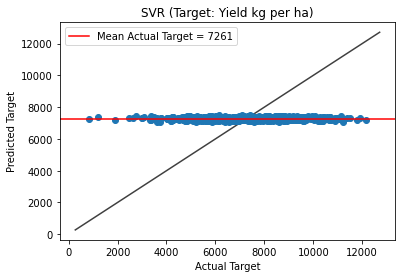

GBR
MAE on test data: 1544.1573605960486
RMSE on test data: 1935.7307287106332
R squared on test data: -0.2692937114316225
MAPE on test data: 23.522754055794426


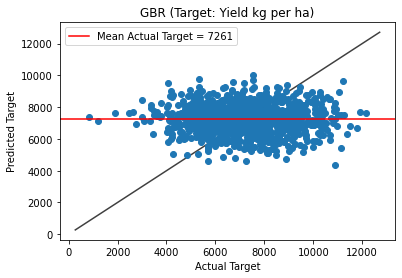

XGBoost
MAE on test data: 1422.488261050273
RMSE on test data: 1773.0383881315545
R squared on test data: -0.06489923987359991
MAPE on test data: 24.638372701884258


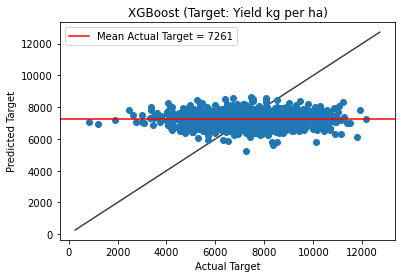

In [158]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

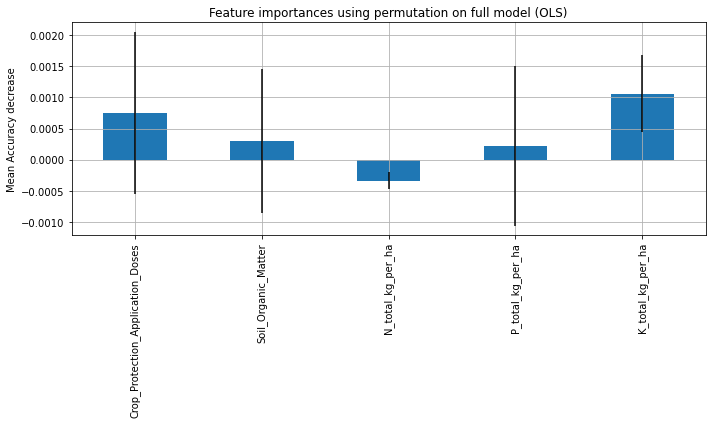

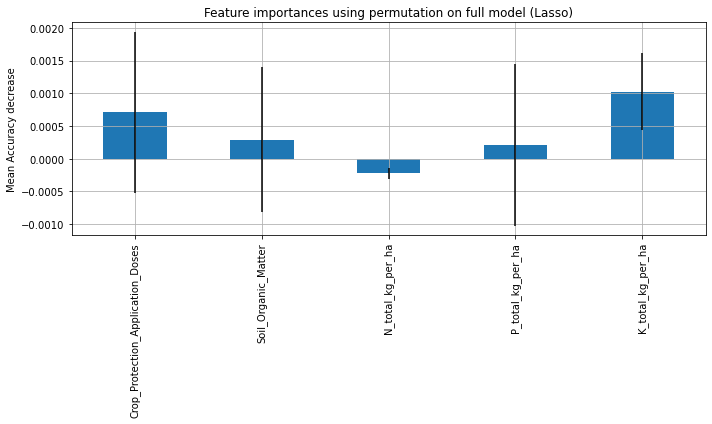

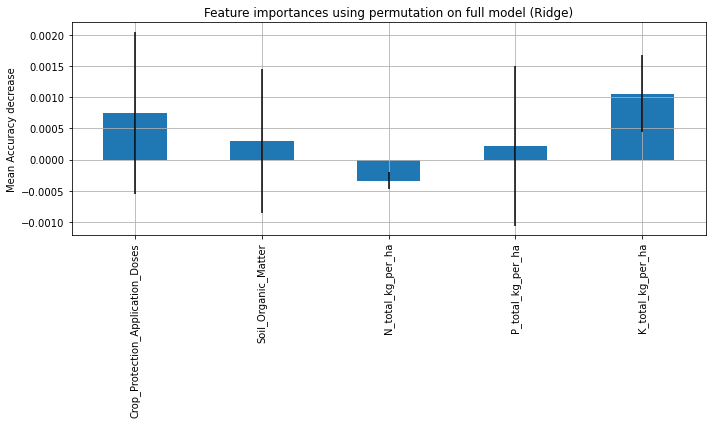

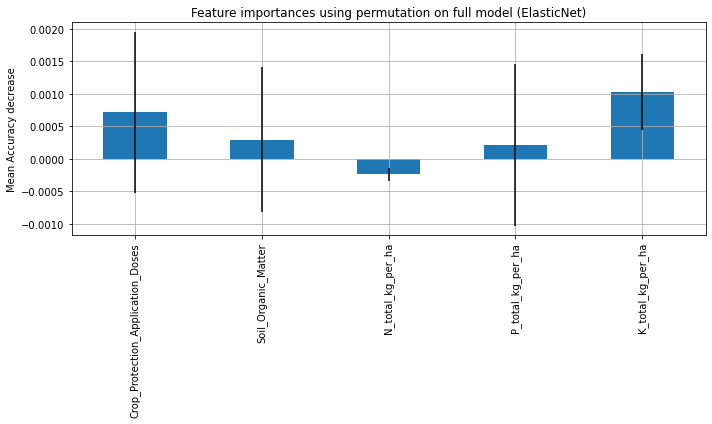

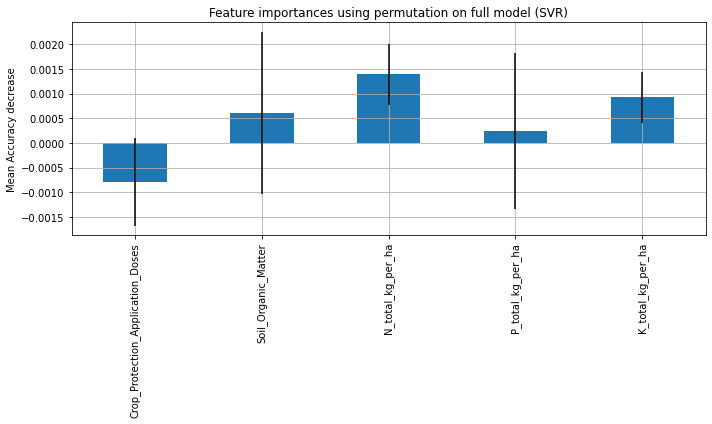

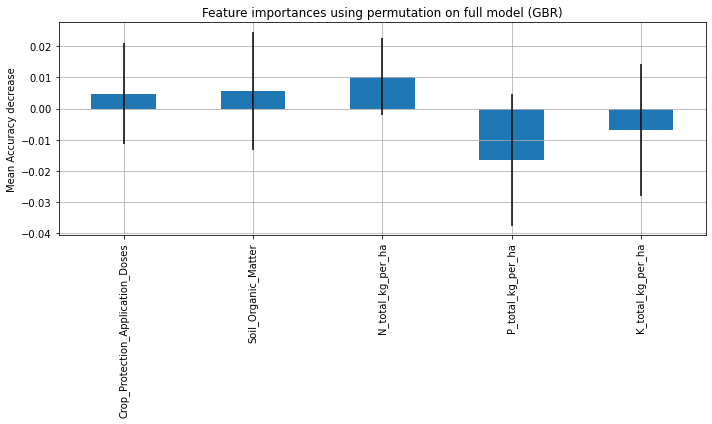

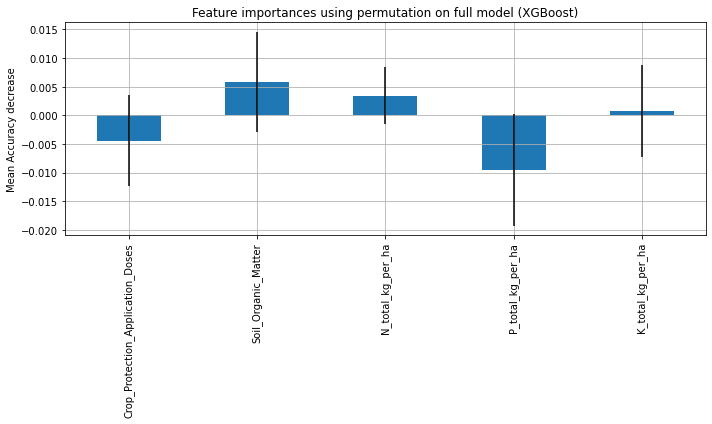

In [159]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()